## Проект 11

# Тема: Многоклассовая и полиномиальная классификация

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import time
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, classification_report
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification, load_iris

Сгенерируем данные и значения целевой переменной для задачи многоклассовой классификации:

In [ ]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=3,
                           n_clusters_per_class = 1,
                           class_sep=3,
                           random_state=0)

Выведем их в виде датафрейма, дав названия колонкам:

In [ ]:
df = pd.DataFrame(data =X, columns = ['x'+str(i) for i in range(1,3)])
df['y'] = y
df.head()

,x1,x2,y
0,2.407448,-2.764747,0
1,3.921765,2.759140,1
2,2.581345,2.396164,1
3,3.431664,2.693400,1
4,4.208167,-4.953762,0


Визуализируем данные на диаграмме рассеивания, подкрасив классы разными цветами:

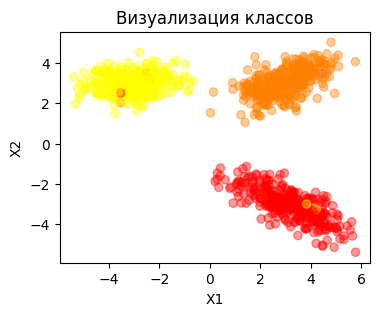

In [ ]:
plt.figure(figsize = (4,3))
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

Разделим данные на обучающую и тестовую части:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Реализуем модель логистической регрессии LogisticRegression на `sklearn`. Для этого обучим модель на обучающих данных:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Выведим коэффициенты гиперплоскостей:

In [ ]:
model.intercept_

array([ 1.2663943 , -1.52982744,  0.26343314])

In [ ]:
model.coef_

array([[-0.09875686, -1.09480091],
       [ 1.05541878,  0.9378374 ],
       [-0.95666192,  0.1569635 ]])

Визуализируем области разделения на классы для тестовых данных:

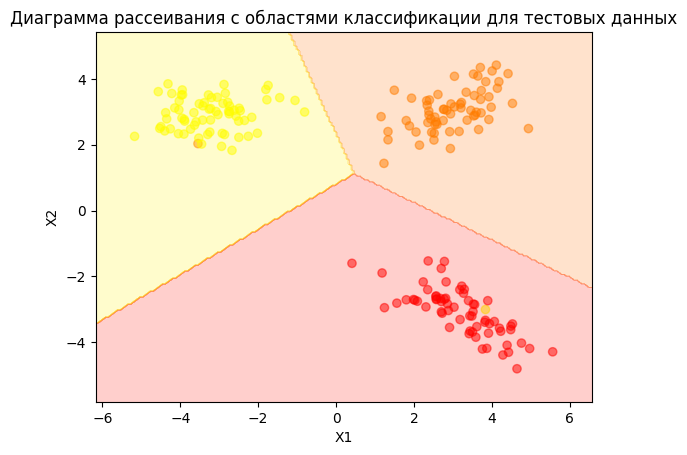

In [ ]:
X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

plt.scatter(X_test[:, 0], X_test[:, 1],  c=y_test, cmap='autumn', alpha = 0.5)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Диаграмма рассеивания с областями классификации для тестовых данных")
plt.show()

Сделаем прогноз на тестовой выборке:

In [ ]:
y_test_pred = model.predict(X_test)

Вычислим метрики качества:

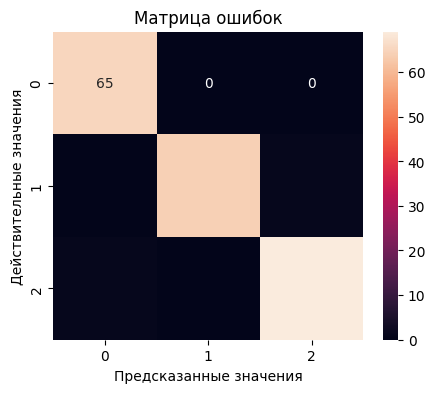

In [ ]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

Метрика accuracy:

In [ ]:
accuracy_score(y_test, y_test_pred)

0.99

Метрика $F_1$ - мера, которая вычисляется с указанием способа усреднения:

In [ ]:
f1_score(y_test, y_test_pred, average='macro')

0.9901095866478434

Выведем отчёт о классификации и сделаем вывод о качестве модели:

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.98      0.99        65
           2       0.99      0.99      0.99        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



Модель классифицирует данные с высокой точностью, которая составляет 99%.

## Задания для самостоятельного выполнения:

### 1. Загрузите встроенный датасет _iris_. Выведите его описание. Возьмите в качестве _X_ только второй и четвёртый столбцы признаков, а целевую переменную обозначьте за _y_. Выведите признаки вместе с целевой переменной в виде датафрейма с соответствующими названиями колонок. Выведите размеры полученного датафрейма, убедитесь, что в данных нет пропущенных значений. Убедитесь, что целевая переменная содержит три значения и определите сколько объектов в каждом классе.
Указание: Для загрузки датасета напишите iris = load_iris(). Для определения количества объектов в каждом классе используйте метод _.value_counts()_ библиотеки _pandas_.

In [ ]:
iris = load_iris()

X = iris.data[:, [1, 3]]
y = iris.target
df = pd.DataFrame(X, columns=['sepal_width', 'petal_width'])
df['target'] = y
df.describe()

,sepal_width,petal_width,target
count,150.000000,150.000000,150.000000
mean,3.057333,1.199333,1.000000
std,0.435866,0.762238,0.819232
min,2.000000,0.100000,0.000000
25%,2.800000,0.300000,0.000000
50%,3.000000,1.300000,1.000000
75%,3.300000,1.800000,2.000000
max,4.400000,2.500000,2.000000


In [ ]:
df.shape

(150, 3)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
class_counts = df['target'].value_counts()
class_counts

target
0    50
1    50
2    50
Name: count, dtype: int64

### 2. Визуализируйте данные на диаграмме рассеяния, подкрасив классы разными цветами. Подпишите классы.

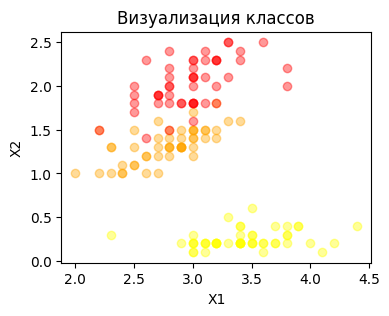

In [ ]:
plt.figure(figsize = (4,3))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0],  c='yellow', label ='Class 0', alpha = 0.4)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  c='orange', label ='Class 1', alpha = 0.4)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2],  c='red', label ='Class 2', alpha = 0.4)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

### 3. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав random_state=1. Выведите получившиеся размеры обучающей и тестовой выборок. Визуализируйте тестовые данные на диаграмме рассеивания.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape[0]

112

In [ ]:
X_test.shape[0]

38

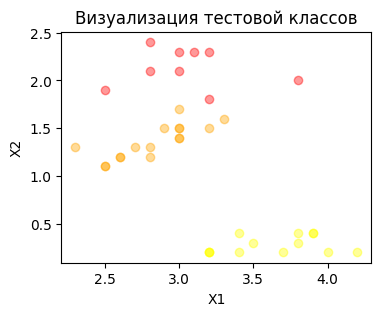

In [ ]:
plt.figure(figsize = (4,3))
plt.scatter(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0],  c='yellow', label ='Class 0', alpha = 0.4)
plt.scatter(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1],  c='orange', label ='Class 1', alpha = 0.4)
plt.scatter(X_test[:, 0][y_test==2], X_test[:, 1][y_test==2],  c='red', label ='Class 2', alpha = 0.4)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация тестовой классов")
plt.show()

### 4. Реализуйте модель логистической регрессии LogisticRegression из _sklearn_ на этих данных. Выведите коэффициенты, полученных гиперплоскостей.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[ 1.21001631, -3.37160448],
       [-0.78183056, -0.14648183],
       [-0.42818574,  3.51808632]])

In [ ]:
model.intercept_

array([ 0.01622149,  3.3934137 , -3.40963519])

### 5. Напечатайте уравнения прямых разделения на классы, полученных в результате применения модели логистической регрессии к рассматриваемым данным.
Указание: Используйте print. Уравнения прямых должны иметь вид $w_{01} + w_{11} x_1  + w_{21} x_2 = 0$, $w_{02} + w_{12} x_1  + w_{22} x_2 = 0$, $w_{03} + w_{13} x_1  + w_{23} x_2 = 0$. Выводите коэффициенты с точностью два знака после запятой. Учтите то, что эти коэффициенты могут быть и отрицательными.

In [ ]:
coefficients = model.coef_
intercepts = model.intercept_

for i in range(len(coefficients)):
    w0 = -intercepts[i]
    w1 = coefficients[i][0]
    w2 = coefficients[i][1]
    if w0 >= 0:
        w0 = "+"+str(round(w0, 2))
    else:
        w0 = str(round(w0, 2))
    if w1 >= 0:
        w1 = "+"+str(round(w1, 2))
    else:
        w1 = str(round(w1, 2))
    if w2 >= 0:
        w2 = "+"+str(round(w2, 2))
    else:
        w2 = str(round(w2, 2))



    print(f'{i}: {w0} {w1}*x1 {w2}*x2 = 0')

0: -0.02 +1.21*x1 -3.37*x2 = 0
1: -3.39 -0.78*x1 -0.15*x2 = 0
2: +3.41 -0.43*x1 +3.52*x2 = 0


### 6. Визуализируйте области разделения на классы для тестовых данных.

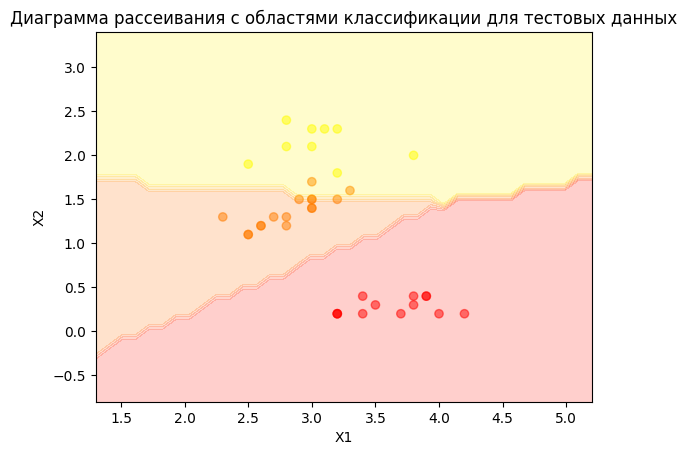

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

plt.scatter(X_test[:, 0], X_test[:, 1],  c=y_test, cmap='autumn', alpha = 0.5)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Диаграмма рассеивания с областями классификации для тестовых данных")
plt.show()

### 7. Сделайте предсказание на тестовых данных и выведите матрицу ошибок классификации. Найдите общее количество сделанных ошибок.

In [ ]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]], dtype=int64)

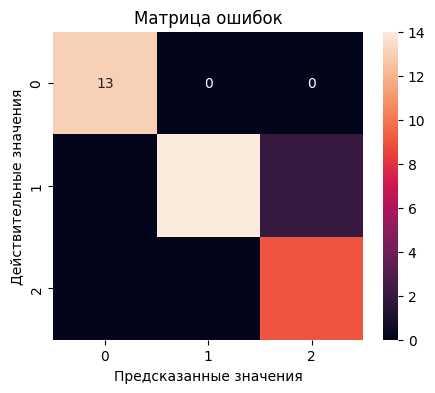

In [ ]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(conf_matrix, annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

In [ ]:
np.sum(y_test != y_pred)

2

### 8. Вычислите метрики качества построенной модели: accuracy, precision, recall и f1.
Указание: Для многоклассовой классификации эти метрики нужно брать усреднёнными, указав способ усреднения: average='macro' или 'weighted'.

In [ ]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.9393939393939394

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.9583333333333334

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.9444444444444445

In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.9482456140350877

### 9. Выведите отчёт о классификации. Сделайте вывод о качестве модели.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



### 10. Из обучающих данных X_train, получите полиномиальные данные 2 степени. Запишите, полученные полиномиальные обучающие данные в датафрейм с названиями колонок $x_1$, $x_2$, ${x_1}^2$, $x_1 x_2$ и ${x_2}^2$. Из тестовых данных X_test, получите полиномиальные тестовые данные аналогичным образом.

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias = False)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[2.800e+00, 1.500e+00, 7.840e+00, 4.200e+00, 2.250e+00],
       [2.500e+00, 1.800e+00, 6.250e+00, 4.500e+00, 3.240e+00],
       [3.000e+00, 2.100e+00, 9.000e+00, 6.300e+00, 4.410e+00],
       [3.500e+00, 3.000e-01, 1.225e+01, 1.050e+00, 9.000e-02],
       [2.200e+00, 1.500e+00, 4.840e+00, 3.300e+00, 2.250e+00],
       [2.900e+00, 1.800e+00, 8.410e+00, 5.220e+00, 3.240e+00],
       [2.900e+00, 1.300e+00, 8.410e+00, 3.770e+00, 1.690e+00],
       [2.600e+00, 2.300e+00, 6.760e+00, 5.980e+00, 5.290e+00],
       [3.800e+00, 3.000e-01, 1.444e+01, 1.140e+00, 9.000e-02],
       [3.600e+00, 2.000e-01, 1.296e+01, 7.200e-01, 4.000e-02],
       [3.000e+00, 3.000e-01, 9.000e+00, 9.000e-01, 9.000e-02],
       [2.700e+00, 1.400e+00, 7.290e+00, 3.780e+00, 1.960e+00],
       [3.400e+00, 2.000e-01, 1.156e+01, 6.800e-01, 4.000e-02],
       [3.500e+00, 2.000e-01, 1.225e+01, 7.000e-01, 4.000e-02],
       [3.800e+00, 2.200e+00, 1.444e+01, 8.360e+00, 4.840e+00],
       [3.100e+00, 2.100e+00, 9.610e+00,

In [ ]:
X_test_poly = poly.transform(X_test)
X_test_poly

array([[ 4.  ,  0.2 , 16.  ,  0.8 ,  0.04],
       [ 2.5 ,  1.1 ,  6.25,  2.75,  1.21],
       [ 3.  ,  1.4 ,  9.  ,  4.2 ,  1.96],
       [ 3.9 ,  0.4 , 15.21,  1.56,  0.16],
       [ 3.8 ,  2.  , 14.44,  7.6 ,  4.  ],
       [ 3.3 ,  1.6 , 10.89,  5.28,  2.56],
       [ 3.1 ,  2.3 ,  9.61,  7.13,  5.29],
       [ 3.8 ,  0.4 , 14.44,  1.52,  0.16],
       [ 3.2 ,  0.2 , 10.24,  0.64,  0.04],
       [ 3.2 ,  2.3 , 10.24,  7.36,  5.29],
       [ 2.7 ,  1.3 ,  7.29,  3.51,  1.69],
       [ 3.9 ,  0.4 , 15.21,  1.56,  0.16],
       [ 3.  ,  2.1 ,  9.  ,  6.3 ,  4.41],
       [ 3.2 ,  1.5 , 10.24,  4.8 ,  2.25],
       [ 2.9 ,  1.5 ,  8.41,  4.35,  2.25],
       [ 3.2 ,  0.2 , 10.24,  0.64,  0.04],
       [ 2.6 ,  1.2 ,  6.76,  3.12,  1.44],
       [ 3.  ,  1.5 ,  9.  ,  4.5 ,  2.25],
       [ 3.4 ,  0.4 , 11.56,  1.36,  0.16],
       [ 3.2 ,  0.2 , 10.24,  0.64,  0.04],
       [ 2.6 ,  1.2 ,  6.76,  3.12,  1.44],
       [ 3.  ,  1.5 ,  9.  ,  4.5 ,  2.25],
       [ 3.  ,  1.7 ,  9.  ,  5.

In [ ]:
pd.DataFrame(X_train_poly, columns = ['$x_1$', '$x_2$', '${x}^2_1$', '$x_1$$x_2$', '$x_1$$x_2$'])

,$x_1$,$x_2$,${x}^2_1$,$x_1$$x_2$,$x_1$$x_2$
0,2.8,1.5,7.84,4.20,2.25
1,2.5,1.8,6.25,4.50,3.24
2,3.0,2.1,9.00,6.30,4.41
3,3.5,0.3,12.25,1.05,0.09
4,2.2,1.5,4.84,3.30,2.25
...,...,...,...,...,...
107,2.8,1.5,7.84,4.20,2.25
108,3.1,1.8,9.61,5.58,3.24
109,2.5,1.5,6.25,3.75,2.25
110,3.1,2.4,9.61,7.44,5.76


### 11. Масштабируйте полиномиальные обучающие и тестовые данные методом стандартной нормализации.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaler = scaler.fit_transform(X_train_poly)
X_test_scaler = scaler.transform(X_test_poly)

In [ ]:
X_train_scaler[:5]

array([[-0.53881591,  0.37946604, -0.57568936,  0.27234213,  0.10772205],
       [-1.25723711,  0.76937609, -1.19208403,  0.39899536,  0.644541  ],
       [-0.05986843,  1.15928615, -0.12599262,  1.15891471,  1.27896338],
       [ 1.13750025, -1.18017419,  1.13393359, -1.05751674, -1.06351927],
       [-1.97565832,  0.37946604, -1.73869817, -0.10761755,  0.10772205]])

### 12. Постойте полиномиальную модель логистической регрессии второй степени, т.е. обучите модель логистической регрессии на масштабированных полиномиальных данных. Сделайте предсказания на соответствующих тестовых данных и найти количество сделанных ошибок.

In [ ]:
logic = LogisticRegression()
logic.fit(X_train_scaler, y_train)
l_pred = logic.predict(X_test_poly)
l_pred

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

In [ ]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [ ]:
errs = np.sum(l_pred != y_test)
errs

16

In [ ]:
l_pred.shape

(38,)

In [ ]:
y_pred.shape

(38,)

### 13. Оцените качество построенной полиномиальной модели. Для этого выведите матрицу ошибок, метрики accuracy и F1, а также отчёт о классификации. Сделайте вывод о том, какая модель классифицирует данные лучше: логистическая регрессия или полиномиальная второй степени?

In [ ]:
conf_matrix_poly = confusion_matrix(y_test, l_pred)
conf_matrix_poly

array([[13,  0,  0],
       [ 0,  0, 16],
       [ 0,  0,  9]], dtype=int64)

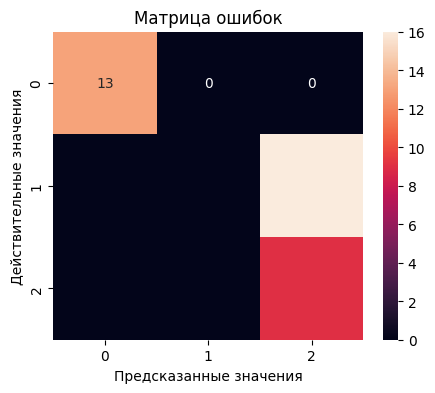

In [ ]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(conf_matrix_poly, annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

In [ ]:
f1_poly = f1_score(y_test, l_pred, average='weighted')
f1_poly

0.4674922600619195

In [ ]:
accuracy_poly = accuracy_score(y_test, l_pred)
accuracy_poly

0.5789473684210527

In [ ]:
report_poly = classification_report(y_test, l_pred)
print(report_poly)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        16
           2       0.36      1.00      0.53         9

    accuracy                           0.58        38
   macro avg       0.45      0.67      0.51        38
weighted avg       0.43      0.58      0.47        38



C:\Users\rita_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rita_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rita_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 14. Визуализируйте получившиеся при помощи полиномиальной модели области разделения на классы для тестовых данных.

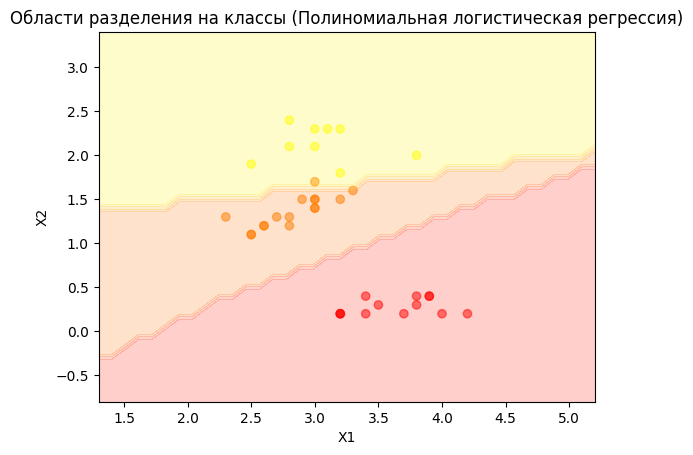

In [ ]:
X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

grid = np.c_[X0_grid.ravel(), X1_grid.ravel()]
grid_poly_scaled = scaler.transform(poly.transform(grid))

Z_grid = logic.predict(grid_poly_scaled).reshape(X0_grid.shape)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn', alpha = 0.5)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Области разделения на классы (Полиномиальная логистическая регрессия)")
plt.show()

 ### 15. Возьмите в качестве _X_ все столбцы признаков датасета _iris_, а целевую переменную обозначьте за _y_. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав random_state=1. Выведите получившиеся размеры обучающей и тестовой выборок. Масштабируйте обучающие и тестовые данные методом стандартной нормализации.

In [ ]:
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df['target'] = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape[0]

112

In [ ]:
X_test.shape[0]

38

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[:5]

array([[ 0.80347326, -0.53881591,  0.45445264,  0.37946604],
       [ 1.04344393, -1.25723711,  1.13159715,  0.76937609],
       [ 1.16342927, -0.05986843,  0.96231102,  1.15928615],
       [-0.8763215 ,  1.13750025, -1.35126605, -1.18017419],
       [ 0.20354656, -1.97565832,  0.68016748,  0.37946604]])

### 16. Постройте модель логистической регрессии на всём датасете _iris_ на предварительно масштабированных данных. Оцените качество построенной модели.

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf = confusion_matrix(y_test, y_pred)
accuracy

0.9736842105263158

In [ ]:
f1

0.9739522830846216

In [ ]:
conf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

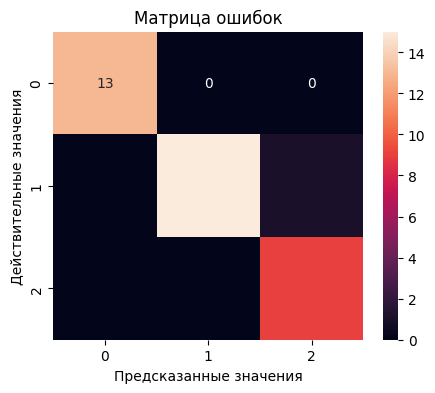

In [ ]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(conf, annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

### 17. Постройте модель полиномиальной классификации третьей степени на всём датасете _iris_, используя конвейер. Оцените качество построенной модели.

In [ ]:
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy

0.9736842105263158

In [ ]:
f1

0.9739522830846216

In [ ]:
conf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

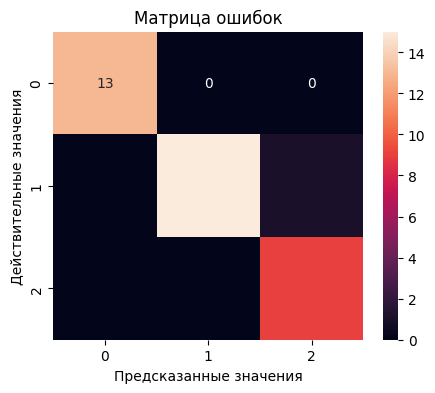

In [ ]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(conf, annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

### 18. Замерьте и сравните временя обучения построенных моделей логистической регрессии на масштабированных данных и полиномиальной третьей степени.

In [ ]:
start_time = time.time()
log_model_scaled = LogisticRegression()
log_model_scaled.fit(X_train_scaled, y_train)
time_scaled = time.time() - start_time
time_scaled

0.00974583625793457

In [ ]:
start_time = time.time()
pipeline.fit(X_train, y_train)
time_poly = time.time() - start_time
time_poly

0.026013851165771484